# ANALISIS EXPLORATORIO DE DATOS - EDA

Importación de modulos requeridos para el EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from wordcloud import WordCloud, ImageColorGenerator
warnings.filterwarnings('ignore')
sns.set_theme()

# Declaramos funciones a utilizar


In [2]:
def mat_corr(dataset: pd.DataFrame, campo:str, tup_fig: tuple = (15,5)):
    """Esta funcion recibe un dataset, un campo del dataset y una tupla con el tamaño que tendra el lienzo a imprimir, 
    esta funcion calcula la matriz de correlacion entre las variables numericas que contenga el data set 
    y la retorna, ademas la imprime en pantalla"""
    media_group = dataset.groupby(campo).mean()
    matrx_corr = media_group.corr()
    plt.figure(figsize=tup_fig)
    sns.heatmap(matrx_corr, annot=True, cmap='coolwarm')
    title = 'matriz de correlacion agrupando por '+ campo
    plt.title(title.upper())
    plt.show()
    return media_group

In [3]:
def grafica_comparacion(media_group: pd.DataFrame, campo:list, tup_fig: tuple =  (15,5)):
    """Esta funcion recibe un dataframe, una lista de campos y una tupla con el tamaño que tendra el grafico,
    esta funcion grafica todos los campos recibidos y los imprime en pantalla"""
    if type(campo) == str:
        campo = [campo]
    
    plt.figure(figsize=tup_fig)
    for i in range(len(campo)):
        plt.plot(media_group[campo[i]], lw= 4)
        
    plt.xticks(rotation=90)
    plt.legend(campo, fontsize=15)
    plt.title('grafica comparativa'.upper())
    plt.show()

In [4]:
def graf_st(data: pd.DataFrame, variable: str, tup_fig: tuple =  (15,5), ventana:int = 5):
    """Esta funcion recibe un dataframe, un campo del dataframe y el tamaño en una tapla que 
    tendra el grafico a imprimir, esta utiliza el algoritmo rolling window para hacer una estimacion 
    promedio del campo y asi mostrar una curva mas suave y mas facil de interpretar y ver tendencias"""
    promedio_tendencia = data[variable].rolling(window=ventana, center = True).mean()
    """La función rolling() es útil para analizar tendencias o patrones en los datos a medida 
    que se desplazan a lo largo del tiempo o en una secuencia ordenada."""
    plt.figure(figsize = tup_fig)
    plt.plot(data.index, data[variable], label = variable.title() + ' ' + 'Promedio', lw= 4)
    plt.plot(promedio_tendencia, lw = 4, label = variable.title() + ' ' +'Promedio - Rolling Window')
    plt.xlabel('Fecha')
    plt.ylabel(variable)
    plt.legend(fontsize=15)
    plt.show()

# Carga del dataset y seleccion de campos

In [5]:
file = '../../backup/data_definitiva/data_movies_full.csv'
data = pd.read_csv(file, index_col=0)
data.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,id_coleccion,nombre_coleccion,id_companie,companie,iso_3166_1,country,iso_639_1,languaje,name_actor,name_director
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,10194.0,Toy Story Collection,3.0,Pixar Animation Studios,US,United States of America,en,English,Tom Hanks,John Lasseter
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,10194.0,Toy Story Collection,3.0,Pixar Animation Studios,US,United States of America,en,English,Tim Allen,John Lasseter
2,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,10194.0,Toy Story Collection,3.0,Pixar Animation Studios,US,United States of America,en,English,Don Rickles,John Lasseter
3,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,10194.0,Toy Story Collection,3.0,Pixar Animation Studios,US,United States of America,en,English,Jim Varney,John Lasseter
4,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,10194.0,Toy Story Collection,3.0,Pixar Animation Studios,US,United States of America,en,English,Wallace Shawn,John Lasseter


- Vemos los campos que contiene el dataset y asi tomar los campos que aportan valor a nuestro analisis exploratorio de datos.

In [6]:
dataset = data[['budget', 'popularity', 'release_date', 'revenue', 
                'runtime', 'title', 'vote_average', 'vote_count', 
                'return', 'genero', 'companie', 'country', 'languaje', 
                'name_actor', 'name_director']]
dataset.drop_duplicates(inplace=True)
dataset.head()

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,return,genero,companie,country,languaje,name_actor,name_director
0,30000000,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,12.451801,Animation,Pixar Animation Studios,United States of America,English,Tom Hanks,John Lasseter
1,30000000,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,12.451801,Animation,Pixar Animation Studios,United States of America,English,Tim Allen,John Lasseter
2,30000000,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,12.451801,Animation,Pixar Animation Studios,United States of America,English,Don Rickles,John Lasseter
3,30000000,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,12.451801,Animation,Pixar Animation Studios,United States of America,English,Jim Varney,John Lasseter
4,30000000,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,12.451801,Animation,Pixar Animation Studios,United States of America,English,Wallace Shawn,John Lasseter


# Inicialmente graficamos la matriz de correlacion para observar la correlacion que tienen las variables numericas entre si

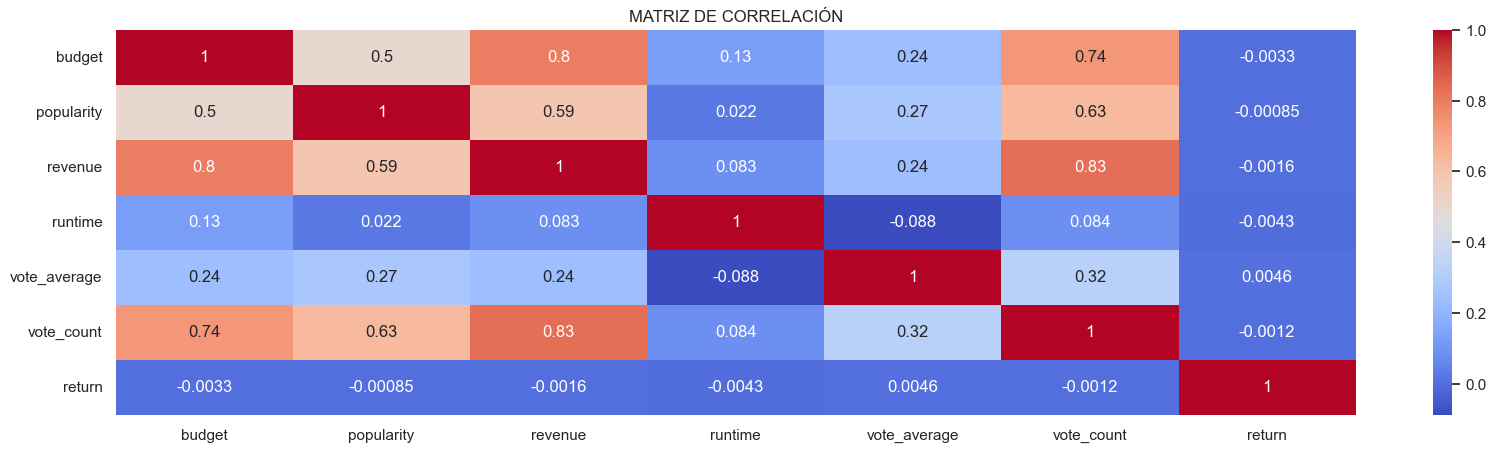

In [7]:
tup_fig = (20, 5) # inicializamos una tupla para el tamaño de las figuras
matrx_corr = dataset.corr() # calculamos la matriz de correlacion
plt.figure(figsize=tup_fig) # creamos una figura con un tamaño 
sns.heatmap(matrx_corr, annot=True, cmap='coolwarm') # graficamos la matriz de correlacion 
plt.title('Matriz de Correlación'.upper()) # titulo del grafico
plt.show() # mostramos el grafico

A partir del grafico de correlacion que se realizo entre las variables numericas podemos observar unas correlaciones muy fuertes y podemos deducir que:

- Las peliculas que contaban con un mayor presupuesto obtenian mayor cantidad de votos (0.74)
- Las peliculas que contaban con un mayor presupuesto tambien tenian mas altos ingresos (0.8)
- Las peliculas que obtuvieron mayores ingresos tambien fueron mas veces votadas (0.83)

Por otra parte vemos otras correlaciones no tan fuertes pero si existe dependencia de alguna manera:

- Las peliculas mas populares tambien son mas veces votadas (0.63)
- La popularidad de las peliculas influye moderadamente en los ingresos de la misma (0.59)

# Hacemos un agrupamiento de los datos por GENERO

- Se calcula la media de las campos numericos con respecto al genero

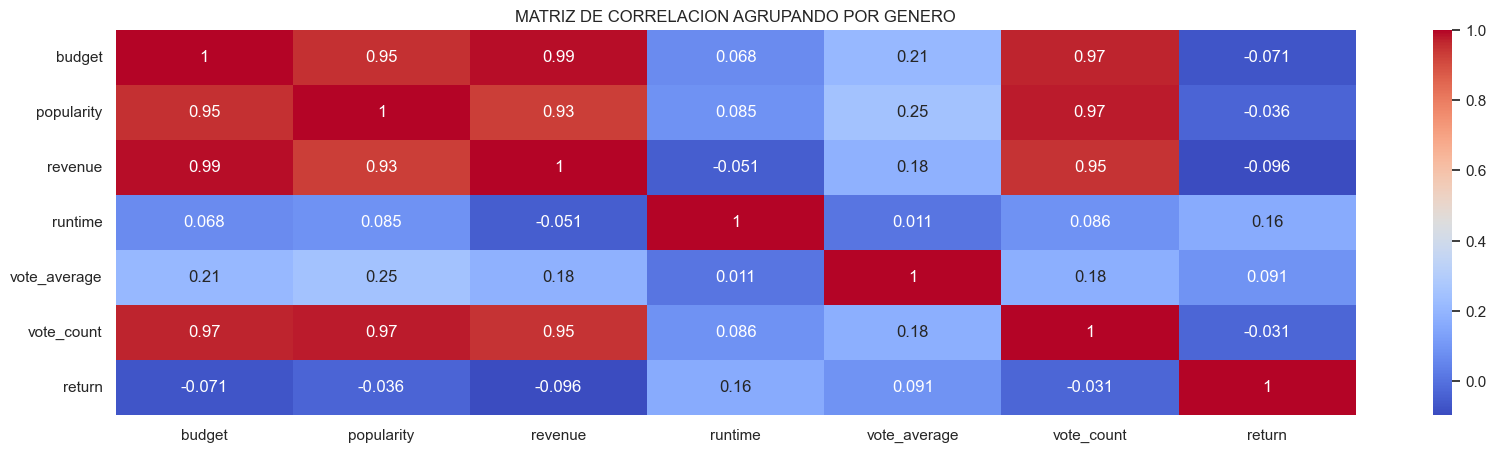

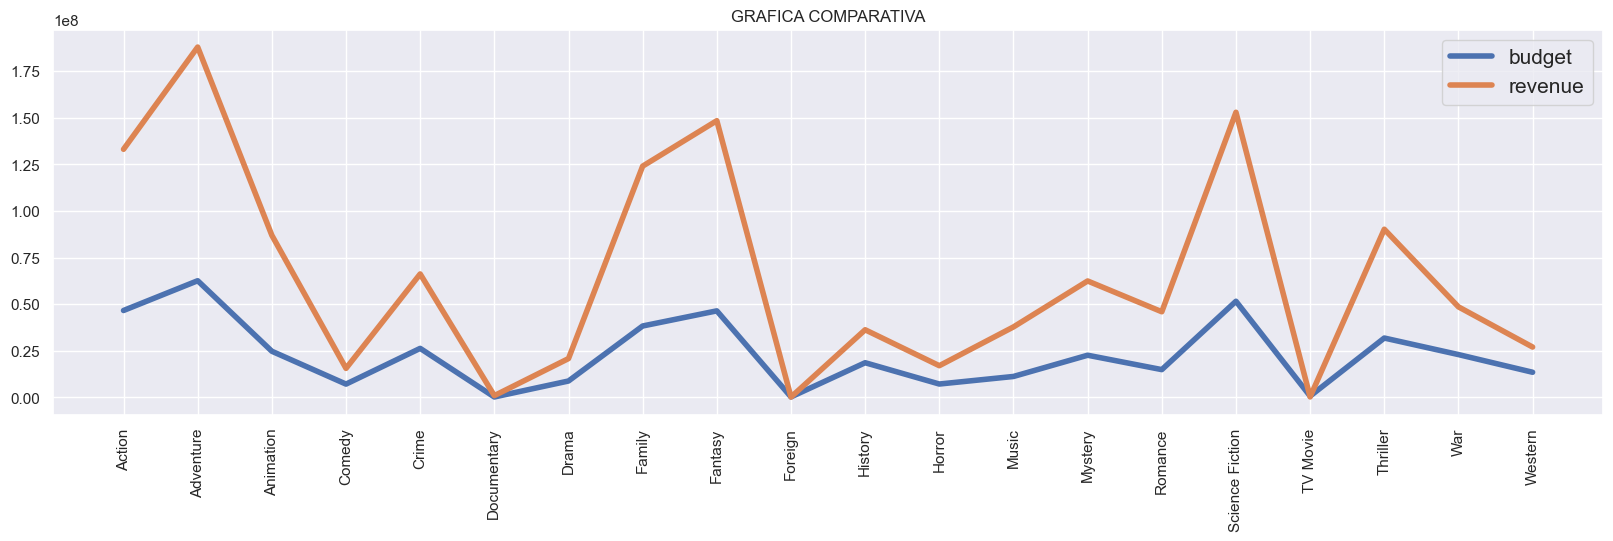

In [8]:
media_genero_group = mat_corr(dataset, 'genero', tup_fig)
grafica_comparacion(media_genero_group, ['budget', 'revenue'], tup_fig)

De acuerdo a la matriz de correlacion y la grafica de comparacion BUDGET VS REVENUE podemos observar que:

- Vemos una correlacion lineal positiva entre los ingresos y el presupuesto.
- Las peliculas que mas ingresos obtuvieron tambien son las mas populares, tiene una correlacion de (0.93) y tambien son las mas votadas (0.97).
- A excepcion de unos pocos generos de pelicula, las peliculas de la mayoria de los generos logran ser rentables cuando son lanzadas, pues como vemos el la figura que compara los ingresos y el presupuesto los ingresos son en la mayoria de los casos superiores al presuspuesto medio con los que cuentan las peliculas de acuerdo al genero.
- Las peliculas de los generos Adventure, Family, Fantasy y Science Fiction son las que obtienen mejores ganancias cuando son lanzadas.

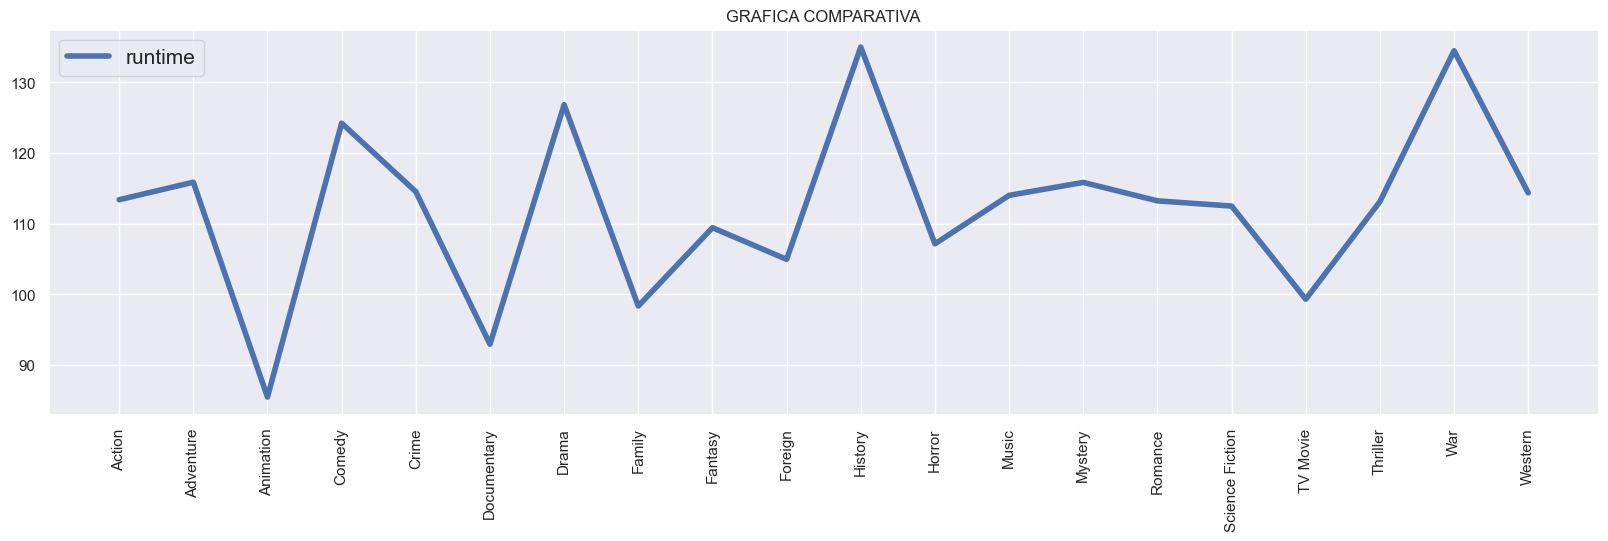

In [9]:
grafica_comparacion(media_genero_group, ['runtime'], tup_fig)

Al agrupar por genero y ver el promedio de duracion de las peliculas segun el genero podemos notar que:

- Las peliculas de los generos Animacion y Documentary son en promedio las mas cortas.
- Las peliculas de genero War, History, Drama y Comedy son las mas largas con promedio de duracion de mas de 120 minutos.
- El resto de generos mantienen un promedio de duracion entre 100 y 120 minutos.

# Agrupamiento de acuerdo al IDIOMA

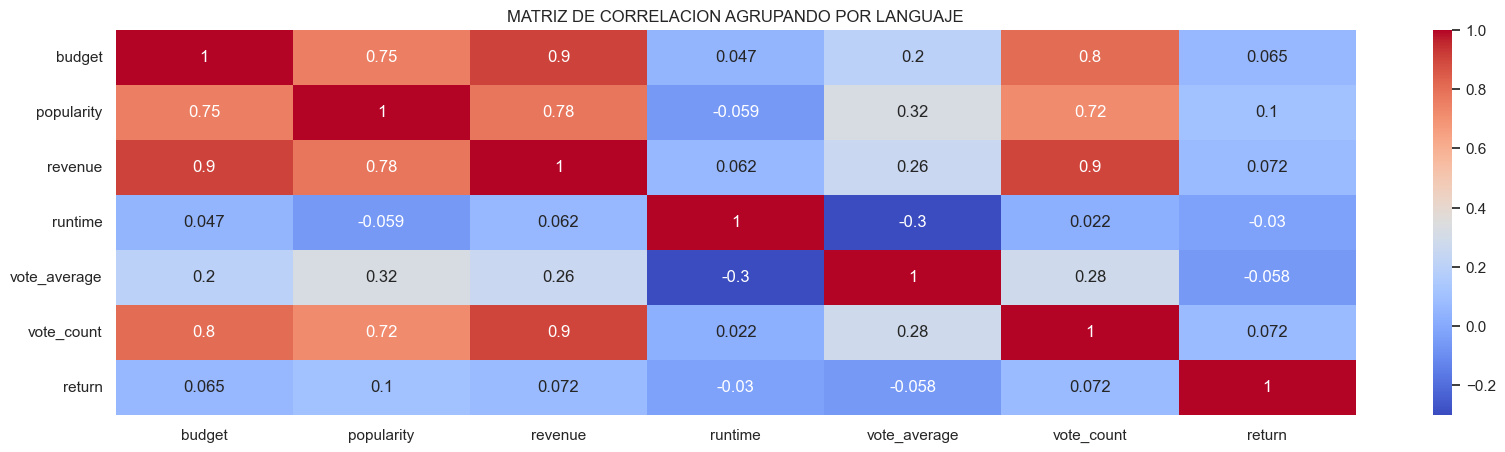

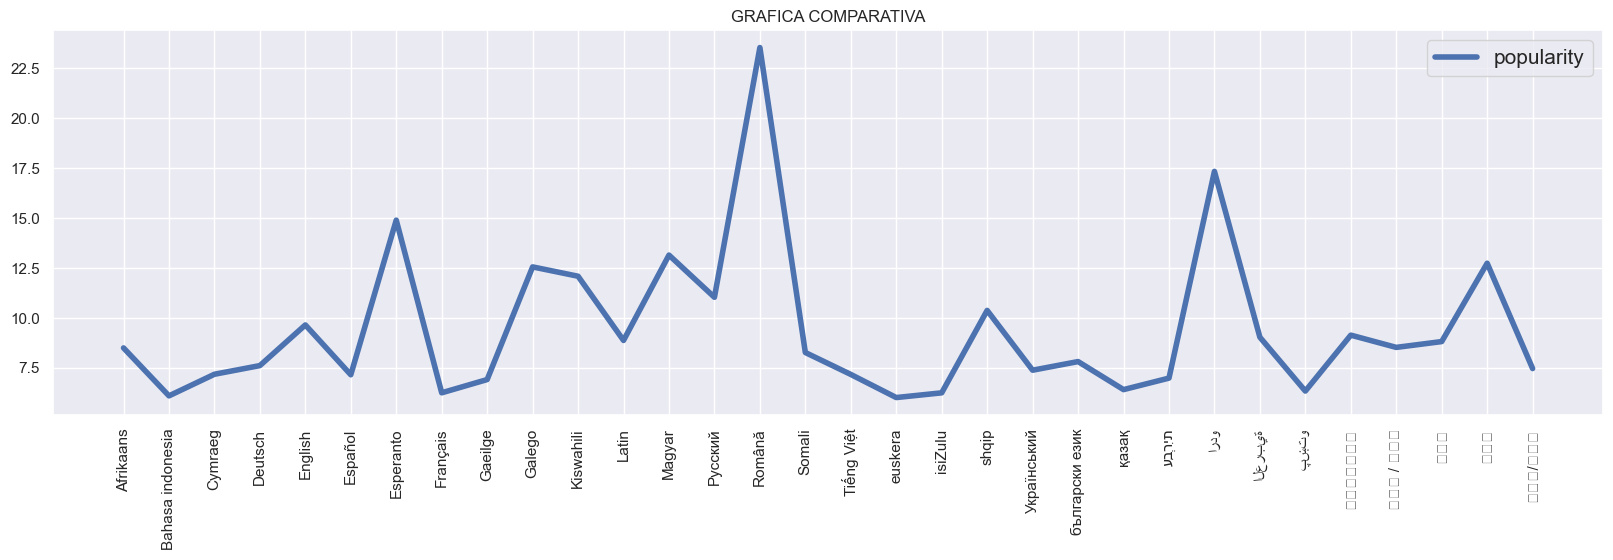

In [10]:
media_languaje_group = mat_corr(dataset, 'languaje', tup_fig)
# graficamos la media de popularidad agrupado por idioma siempre y cuando la popularidad sea mayor a la media + 2
grafica_comparacion(media_languaje_group[media_languaje_group['popularity'] > media_languaje_group['popularity'].mean()], 
                    'popularity', 
                    tup_fig)

La media de popularidad de las peliculas por idioma es de 5.59 puntos, 32 de los 74 idiomas estan por debajo de la media, las peliculas cuyo idioma es el universal (ingles) cuentan con una popularidad media cercana a los 10 puntos, los idiomas Romana, Esperanto y  اردو tienen una popularidad atipica por encima de los 15 puntos.

# Iniciamos un analisis como series de tiempo

Usaremos el algoritmo de rolling window para filtrar un poco la señal y ver la figura un poco mas prolija para analizar el grafico.

- Creamos un nuevo dataset con los campos que requerimos para hacer el analisis temporal

In [11]:
data_st = dataset[['budget', 'popularity', 'release_date', 'revenue', 
                   'runtime', 'vote_average', 'vote_count']]
data_st.drop_duplicates(inplace=True)
data_st.head()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
0,30000000,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0
39,65000000,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0
507,0,11.712900,1995-12-22,0.0,101.0,6.5,92.0
535,16000000,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0
565,0,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0


- Convertimos el campo release_date a dato de tipo fecha

In [12]:
# convertimos la columna a tipo fecha
data_st.release_date = pd.to_datetime(data_st.release_date)

- Hacemos un resampleo del dataframe para pasar las fechas diarias a anuales

In [13]:
anual = data_st.resample('Y', on='release_date').mean()
anual.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
release_date,,,,,,
1874-12-31,0.0,0.480371,0.0,1.0,6.0,19.0
1875-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1876-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1877-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1878-12-31,0.0,0.327841,0.0,1.0,6.2,25.0


- imputamos valores faltantes con la funcion interpolate


In [14]:
anual.interpolate(inplace=True)
anual.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
release_date,,,,,,
1874-12-31,0.0,0.480371,0.0,1.0,6.00,19.0
1875-12-31,0.0,0.442238,0.0,1.0,6.05,20.5
1876-12-31,0.0,0.404106,0.0,1.0,6.10,22.0
1877-12-31,0.0,0.365974,0.0,1.0,6.15,23.5
1878-12-31,0.0,0.327841,0.0,1.0,6.20,25.0


Ya tenemos el dataframe 'anual' que contiene los campos 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count' con la media de cada uno de ellos en el respectivo año de todas las peliculas. tenemos una ventana temporal de 147 años.

- Iniciamos con el campo runtime.

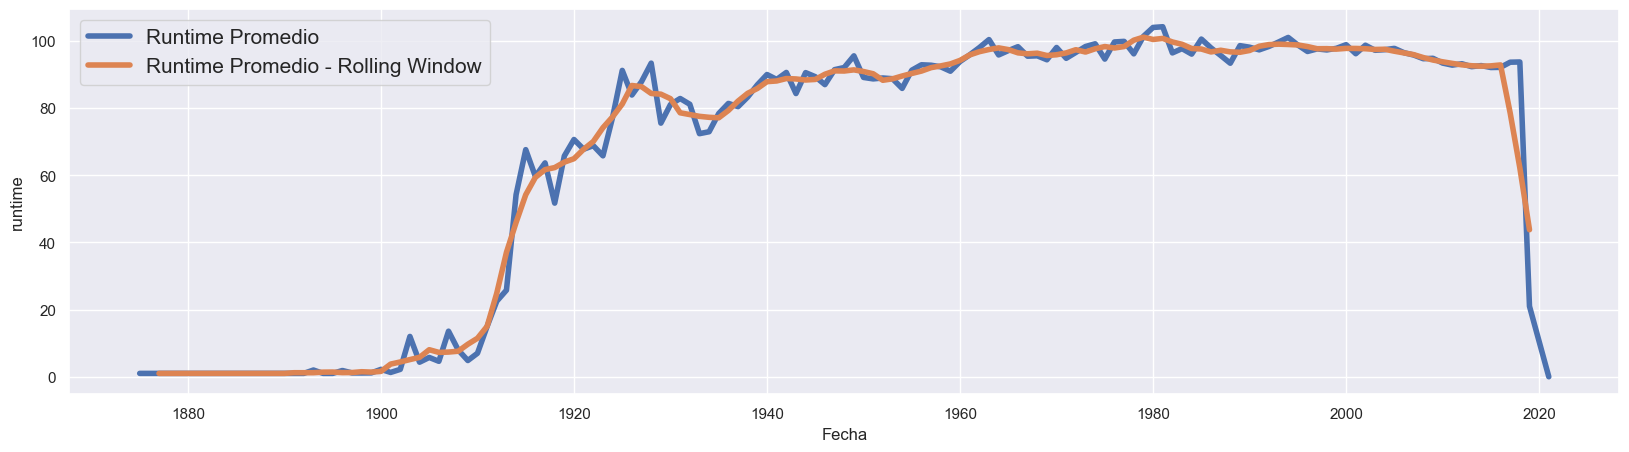

In [15]:
graf_st(anual, 'runtime', tup_fig)

Con la figura anterior podemos ver que inicialmente las peliculas tenian una duracion muy corta, esto puede ser debido a una combinacion de factores como las limitaciones tecnicas, costos de produccion, tecnologia, etc.

Con el pasar del tiempo se solucionaron todos estos problemas y las peliculas aumentaron el tiempo de duracion y al dia de hoy estas presentan un promedio de tiempo alrededor de los 100 minutos.

- Continuamos con el campo popularity

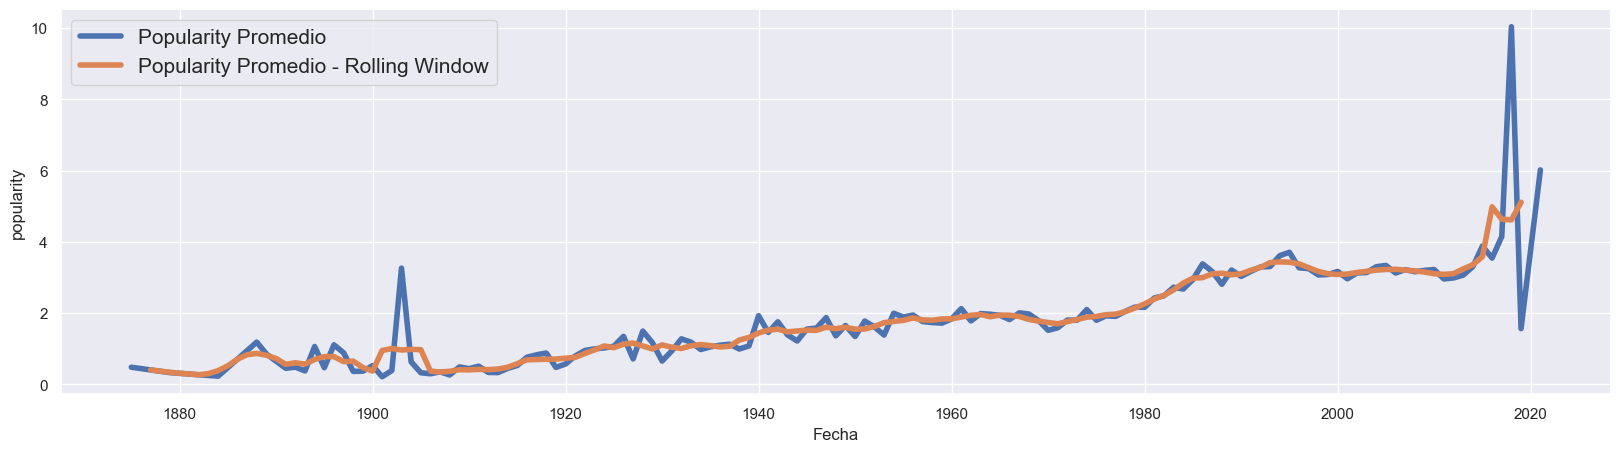

In [16]:
graf_st(anual, 'popularity', tup_fig)

La popularidad de una película se refiere a su nivel de reconocimiento, atracción o aceptación por parte del público en general. Es una medida subjetiva que indica cuánto interés o atención ha generado una película entre la audiencia.

Por el grafico inmediatamente anterior podemos observar que las productores han venido trabajando mas en complacer su audiencia y han logrado que las peliculas a dia de hoy tengan una mejor aceptacion.

- Finalizamos con el analisis del campo revenue(ingresos).

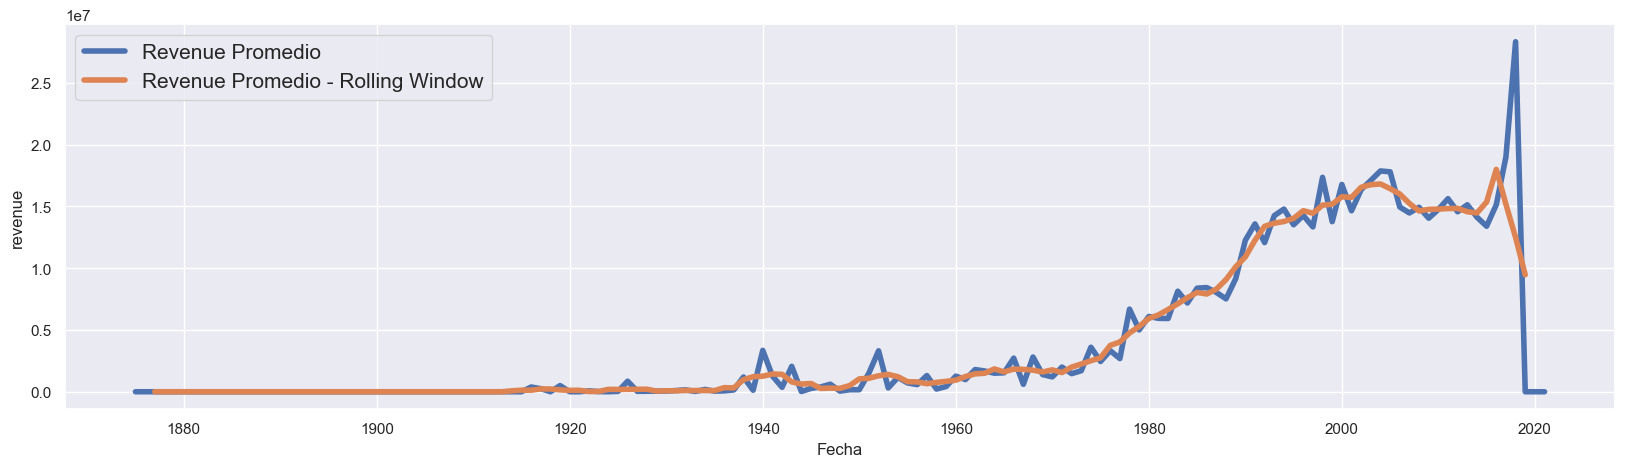

In [17]:
graf_st(anual, 'revenue', tup_fig)

En el grafico  anterior que vemos la representacion de los ingresos promedios anuales de las peliculas desde el año 1874 notamos que a lo largo de los años, el crecimiento poblacional y por ende el aumento de la audiencia ha provocado que las ingresos anuales al la industria del entretenimiento han incrementado y se proyecta siga ascendentemente. En conclusion, en los ultimos años las compañias productoras de peliculas han llenado su bolsa.

# WORDCLOUD

Creamos una imagen con las palabras mas recurrentes dentro de los titulos de las peliculas

- Genero una cadena a partir de todos los titulos de las peliculas que se encuentran en el dataset

In [18]:
nube = dataset.title.unique()
nube = ' '.join(nube)

- Instancio un objeto de tipo WordCloud


In [19]:
wc = WordCloud()
wc.generate(nube)

- Procedo a generar la imagen 

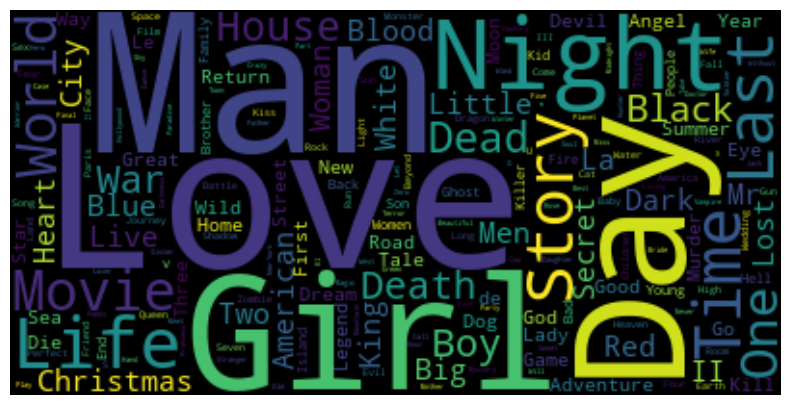

In [20]:
plt.figure(figsize=tup_fig)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# guardar imagen
plt.savefig('WORDCLOUD.png')

<Figure size 640x480 with 0 Axes>